In [72]:
from matplotlib.pyplot import plot
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import math
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.preprocessing import MinMaxScaler
## import packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout



In [73]:
# monthly stock data
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 1, 1)
lennar = yf.download("Len", start, end ,interval='1mo')['Close']

[*********************100%***********************]  1 of 1 completed


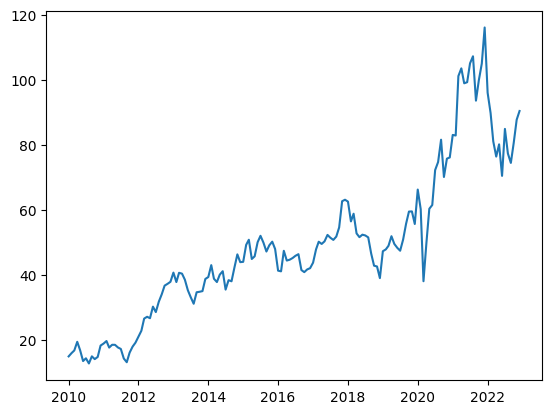

In [74]:
plt.plot(lennar)

### API: world Bank

In [75]:
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=2010, end=2023)
gdp.rename(columns={'NY.GDP.MKTP.CD':'gdp'})

gdp
country       year                
United States 2021  23315080560000
              2020  21060473613000
              2019  21380976119000
              2018  20533057312000
              2017  19477336549000
              2016  18695110842000
              2015  18206020741000
              2014  17550680174000
              2013  16843190993000
              2012  16253972230000
              2011  15599728123000
              2010  15048964444000

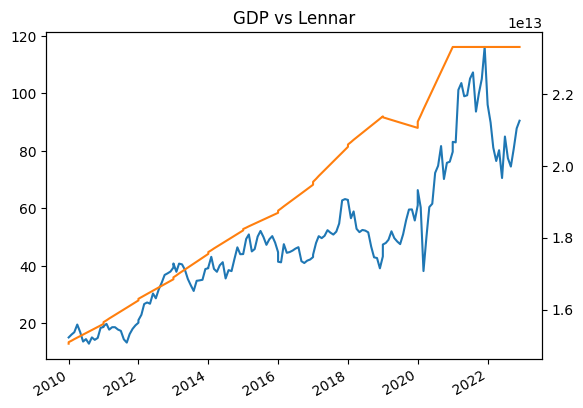

In [76]:
df_gdp = gdp.unstack().T.reset_index(0)
df_gdp.index = pd.to_datetime(df_gdp.index, format='%Y',  utc=True).map(lambda x: x.tz_convert('US/Eastern'))

df_lennar = lennar.copy()
df_lennar=df_lennar.to_frame()
data = df_lennar.join(df_gdp, how='outer')
data = data.interpolate(method='linear')

ax = data['Close'].plot()
ax = data['United States'].plot(ax=ax, secondary_y=True)
plt.title('GDP vs Lennar')
plt.show()


In [77]:
infaltion = wb.download(indicator='FP.CPI.TOTL.ZG', country='USA', start=2010, end=2023)
infaltion.rename(columns={'FP.CPI.TOTL.ZG':"infaltion"})


infaltion
country       year           
United States 2021   4.697859
              2020   1.233584
              2019   1.812210
              2018   2.442583
              2017   2.130110
              2016   1.261583
              2015   0.118627
              2014   1.622223
              2013   1.464833
              2012   2.069337
              2011   3.156842
              2010   1.640043

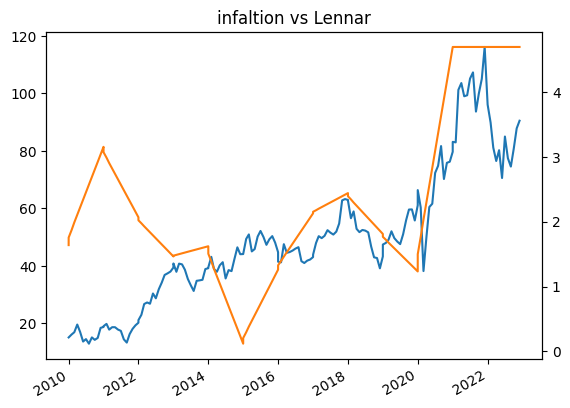

In [78]:
df_infaltion = infaltion.unstack().T.reset_index(0)
df_infaltion.index = pd.to_datetime(df_infaltion.index, format='%Y',  utc=True).map(lambda x: x.tz_convert('US/Eastern'))

df_lennar = lennar.copy()
df_lennar=df_lennar.to_frame()
data = df_lennar.join(df_infaltion, how='outer')
data = data.interpolate(method='linear')
ax = data['Close'].plot()
ax = data['United States'].plot(ax=ax, secondary_y=True)
plt.title('infaltion vs Lennar')
plt.show()

In [79]:
df_lennar = lennar.copy()
df_lennar=df_lennar.to_frame()
df_lennar=df_lennar.reset_index()
df_lennar['Date'] = df_lennar['Date'].dt.tz_localize(None)
df_lennar.index = df_lennar['Date']
df_lennar =df_lennar.drop(columns='Date')

### Economic data https://fred.stlouisfed.org/series/UNRATE

C:\Users\guanhupa\AppData\Local\Temp\ipykernel_22856\3772292686.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Unemployment = pd.read_csv(r"C:\Users\guanhupa\Downloads\UNRATE.csv")


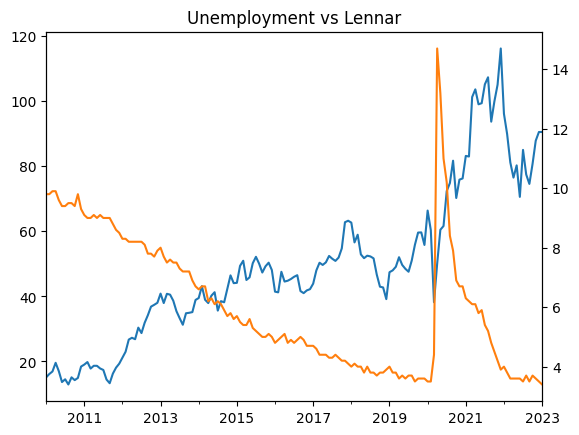

In [80]:
df_Unemployment = pd.read_csv(r"C:\Users\guanhupa\Downloads\UNRATE.csv")
df_Unemployment['DATE'] = pd.to_datetime(df_Unemployment['DATE'])
df_Unemployment =df_Unemployment.dropna()
df_Unemployment = df_Unemployment.set_index('DATE')
data = df_lennar.join(df_Unemployment, how='outer')
data = data.interpolate(method='linear')
ax = data['Close'].plot()
ax = data['UNRATE'].plot(ax=ax, secondary_y=True)
plt.title('Unemployment vs Lennar')
plt.show()

In [81]:
df_rate =pd.read_csv(r"C:\Users\guanhupa\Downloads\MORTGAGE30US.csv")
df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])
df_rate =df_rate.dropna()
df_rate = df_rate.set_index('DATE')

C:\Users\guanhupa\AppData\Local\Temp\ipykernel_22856\184674371.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rate =pd.read_csv(r"C:\Users\guanhupa\Downloads\MORTGAGE30US.csv")


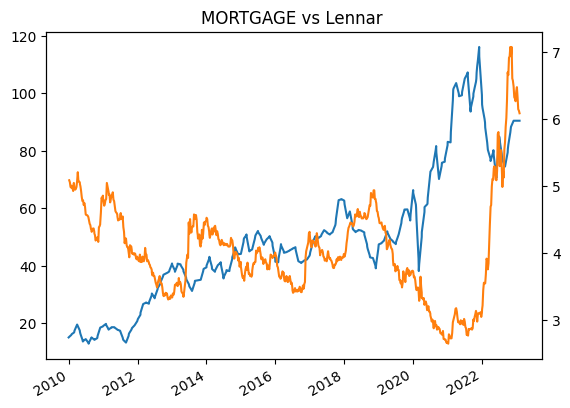

In [82]:
data = df_lennar.join(df_rate, how='outer')
data = data.interpolate(method='linear')
ax = data['Close'].plot()
ax = data['MORTGAGE30US'].plot(ax=ax, secondary_y=True)
plt.title('MORTGAGE vs Lennar ')
plt.show()

In [83]:
# daliy stock data
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 1, 1)
lennar = yf.download("Len", start, end)

[*********************100%***********************]  1 of 1 completed


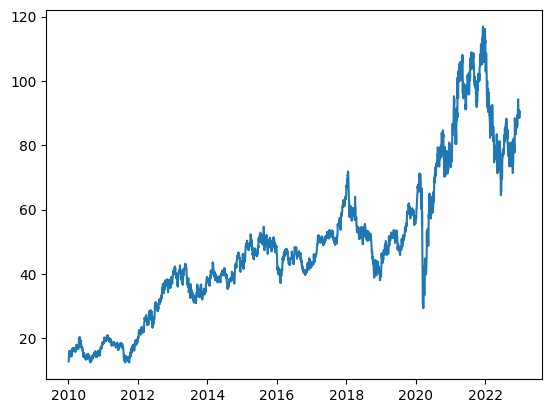

In [84]:
plot(lennar.Close)

In [85]:

dfreg = lennar.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (lennar['High']-lennar['Low'])/lennar['Close']*100
dfreg['PCT_change'] = (lennar['Close']-lennar['Open'])/lennar['Open']*100

dfreg.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
dfreg2 = dfreg.copy()

X = np.array(dfreg.drop(['label'],1))
X_scaled = preprocessing.scale(X)
X_test = X_scaled[-forecast_out:]
X_train= X_scaled[:-forecast_out]

y_test= np.array(dfreg['Adj Close'][-forecast_out:])
y_train= np.array(dfreg['Adj Close'][:-forecast_out])


train_inf = np.isinf(X_train)
X_train[train_inf]

C:\Users\guanhupa\AppData\Local\Temp\ipykernel_22856\4281325874.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dfreg.drop(['label'],1))


array([], dtype=float64)

In [86]:
dfreg.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(dfreg['label'])
y = y[:-forecast_out]


C:\Users\guanhupa\AppData\Local\Temp\ipykernel_22856\3582898988.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dfreg.drop(['label'], 1))


In [87]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)
    
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [88]:
regressionSummary(y_train, clfpoly2.predict(X_train))
regressionSummary(y_test, clfpoly2.predict(X_test))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0100
            Mean Absolute Error (MAE) : 0.0077
          Mean Percentage Error (MPE) : -0.0148
Mean Absolute Percentage Error (MAPE) : 0.0277

Regression statistics

                      Mean Error (ME) : 0.0093
       Root Mean Squared Error (RMSE) : 0.0102
            Mean Absolute Error (MAE) : 0.0093
          Mean Percentage Error (MPE) : 0.0106
Mean Absolute Percentage Error (MAPE) : 0.0106


In [89]:
linearreg = clfreg.score(X_test, y_test)
polyreg = clfpoly2.score(X_test,y_test)
knnreg = clfknn.score(X_test, y_test)

print(
'The linear regression accuracy  is ',linearreg ,'\n',
'The polynomial regression accuracy is ',polyreg ,'\n',
'The knn accuracy is ',knnreg)


The linear regression accuracy  is  1.0 
 The polynomial regression accuracy is  0.9999822900636133 
 The knn accuracy is  -0.5641271666815375


### Splitting into Train and Test

In [90]:
length_data = len(lennar)     
split_ratio = 0.7        
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data count :", length_data)
print("Train  count :", length_train)
print("Validation  count :", length_validation)


Data count : 3272
Train  count : 2290
Validation  count : 982


In [91]:
lennar.reset_index(inplace=True)
train_data = lennar[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  
validation_data = lennar[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  
dataset_train = train_data.Open.values
dataset_train.shape
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape
dataset_train

array([[12.59587002],
       [12.73353004],
       [13.2841692 ],
       ...,
       [46.65000153],
       [46.72000122],
       [45.90000153]])

In [92]:
dataset_train = train_data.Open.values
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train

array([[12.59587002],
       [12.73353004],
       [13.2841692 ],
       ...,
       [46.65000153],
       [46.72000122],
       [45.90000153]])

In [93]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)

In [94]:
X_train = []
y_train = []
time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

### Nerual network

In [95]:
model = models.Sequential()
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (50, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer = "adam", 
              loss = "mean_squared_error",
              metrics = ["accuracy"])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

In [97]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
70/70 [==============================] - 8s 44ms/step - loss: 0.1866 - accuracy: 4.4643e-04
Epoch 2/10
70/70 [==============================] - 3s 46ms/step - loss: 0.1431 - accuracy: 4.4643e-04
Epoch 3/10
70/70 [==============================] - 3s 45ms/step - loss: 0.1118 - accuracy: 8.9286e-04
Epoch 4/10
70/70 [==============================] - 3s 43ms/step - loss: 0.0764 - accuracy: 4.4643e-04
Epoch 5/10
70/70 [==============================] - 3s 44ms/step - loss: 0.0558 - accuracy: 8.9286e-04
Epoch 6/10
70/70 [==============================] - 3s 45ms/step - loss: 0.0377 - accuracy: 8.9286e-04
Epoch 7/10
70/70 [==============================] - 3s 46ms/step - loss: 0.0290 - accuracy: 8.9286e-04
Epoch 8/10
70/70 [==============================] - 3s 45ms/step - loss: 0.0220 - accuracy: 8.9286e-04
Epoch 9/10
70/70 [==============================] - 3s 48ms/step - loss: 0.0192 - accuracy: 8.9286e-04
Epoch 10/10
70/70 [==============================] - 3s 45ms/step - loss:

In [98]:
# Losses
history.history["loss"]

[0.18656332790851593,
 0.1430540829896927,
 0.11181458830833435,
 0.07641390711069107,
 0.05582882836461067,
 0.03772512450814247,
 0.029002318158745766,
 0.022029230371117592,
 0.019208282232284546,
 0.015076182782649994]

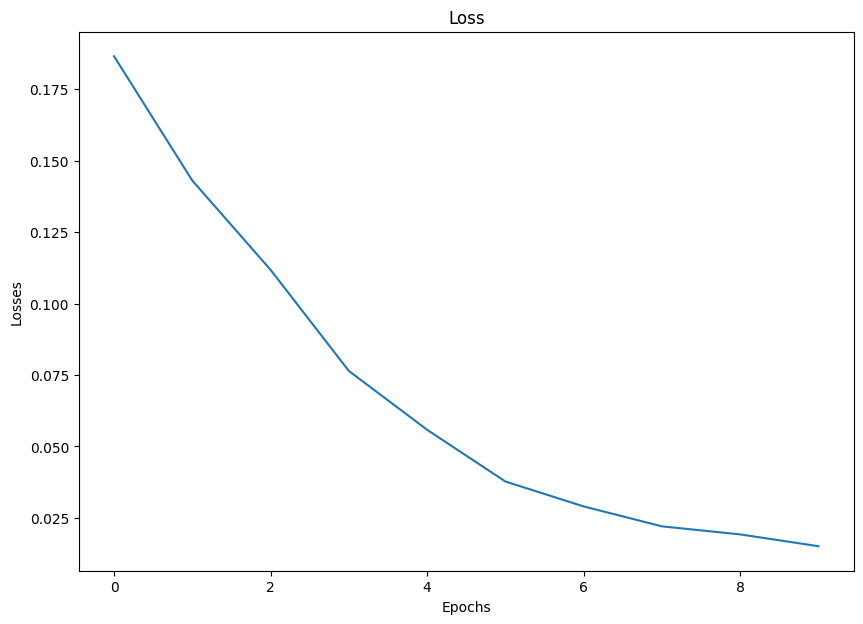

In [99]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss")
plt.show()

### predictions

In [100]:
y_pred = model.predict(X_train)  
y_pred = scaler.inverse_transform(y_pred) 
y_train = scaler.inverse_transform(y_train) 


70/70 [==============================] - 2s 19ms/step


In [101]:
dataset_validation = validation_data.Open.values  
dataset_validation = np.reshape(dataset_validation, (-1,1)) 
scaled_dataset_validation =  scaler.fit_transform(dataset_validation) 
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)    
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  
y_test = np.reshape(y_test, (-1,1))  


In [102]:
y_pred_of_test = model.predict(X_test)

y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 

30/30 [==============================] - 2s 15ms/step


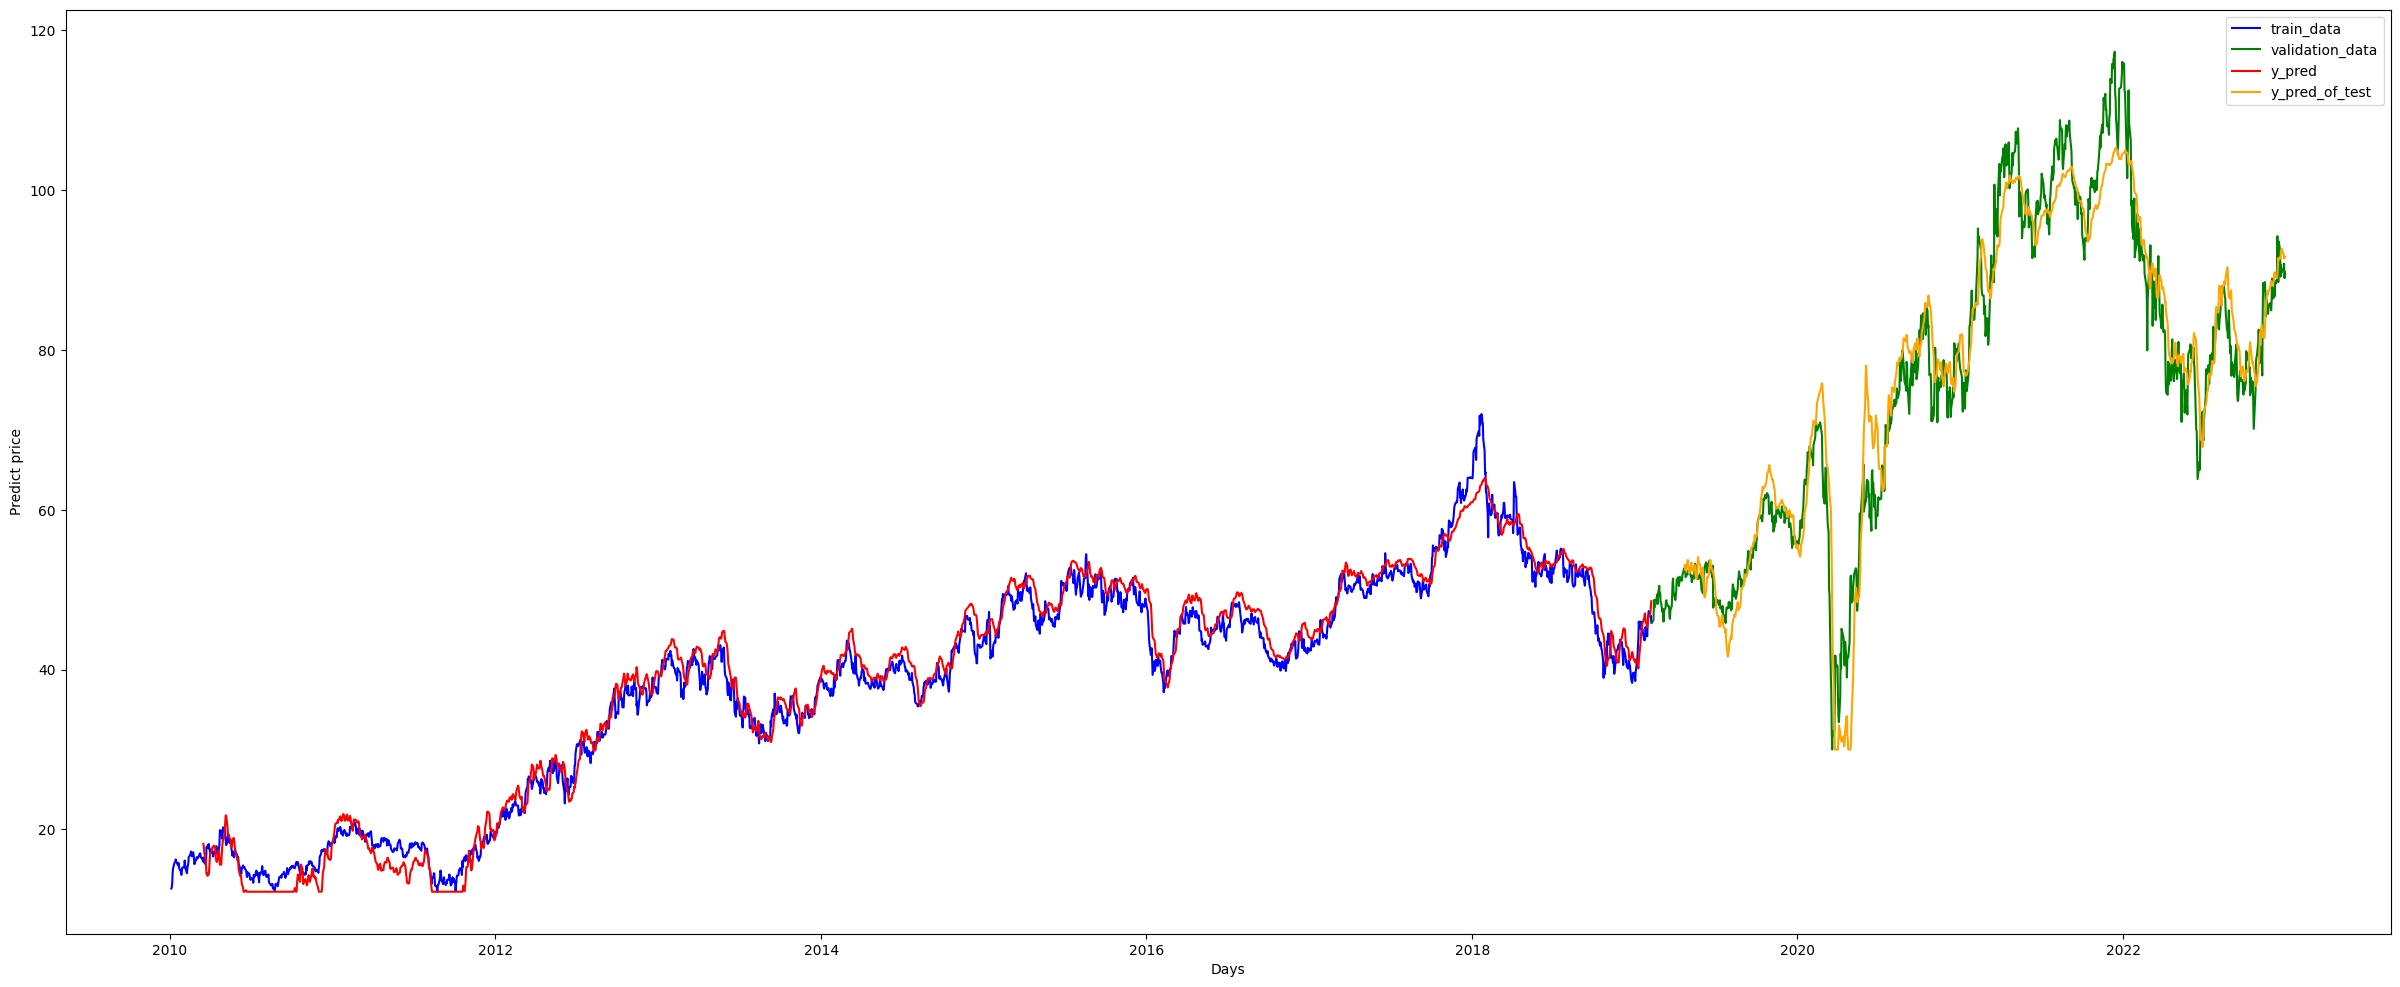

In [103]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Predict price")
plt.legend()
plt.show()

In [104]:
start = dt.datetime(2023, 1, 1)
end = dt.datetime(2023, 2, 1)
lennar1m = yf.download("Len", start, end)
lennar2 =lennar1m.copy()

[*********************100%***********************]  1 of 1 completed


In [105]:
lennar2.reset_index(inplace=False)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03 00:00:00-05:00,91.690002,92.570000,90.739998,91.980003,91.631737,2351900
1,2023-01-04 00:00:00-05:00,93.360001,95.029999,92.709999,93.610001,93.255562,2505400
2,2023-01-05 00:00:00-05:00,92.250000,94.389999,91.820000,93.779999,93.424919,2052300
3,2023-01-06 00:00:00-05:00,94.349998,96.500000,94.349998,95.660004,95.297806,1879200
4,2023-01-09 00:00:00-05:00,95.309998,96.790001,94.919998,95.290001,94.929199,2659000
5,2023-01-10 00:00:00-05:00,94.639999,96.639999,94.209999,96.570000,96.204353,1694000
6,2023-01-11 00:00:00-05:00,97.680000,98.620003,96.610001,98.580002,98.206749,2179200
7,2023-01-12 00:00:00-05:00,99.089996,99.779999,97.209999,99.150002,98.774590,2242900
8,2023-01-13 00:00:00-05:00,96.650002,99.169998,96.379997,98.820000,98.445831,2291400
9,2023-01-17 00:00:00-05:00,98.470001,99.449997,98.059998,98.779999,98.405983,2245400


In [106]:
dataset_validation = lennar2.Open.values  
dataset_validation = np.reshape(dataset_validation, (-1,1)) 
scaled_dataset_validation =  scaler.fit_transform(dataset_validation) 
X_test  = np.array(scaled_dataset_validation)   
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  

In [107]:
af = model.predict(X_test)

af = scaler.inverse_transform(af) 

1/1 [==============================] - 1s 915ms/step


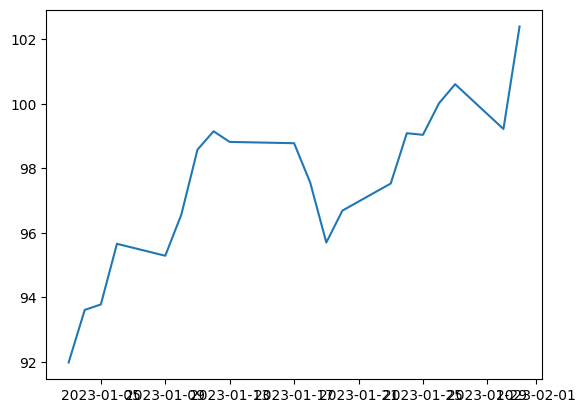

In [108]:
plt.plot(lennar2.Close)


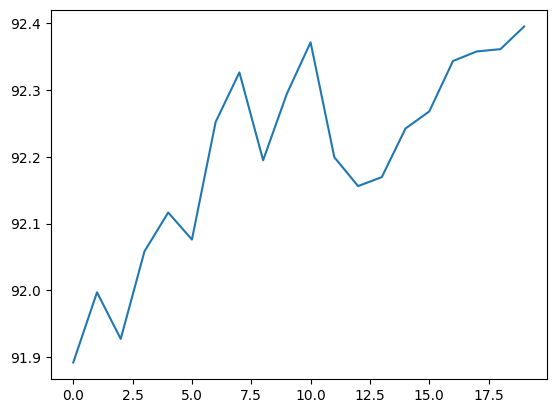

In [109]:
plt.plot(af)